# Parameters tuning

In [1]:
%load_ext autoreload
%autoreload

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


import sys
sys.path.append('../utils')
from utils import perf, thomas_parser, layers_generator

In [3]:
gt = pd.read_csv('../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

#### Solver

The solver for weight optimization.
- ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
- ‘sgd’ refers to stochastic gradient descent.
- ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [16]:
solver = ['lbfgs','sgd', 'adam']
for i in solver:
    print("Solver : %s" % i)
    mlp = MLPClassifier(solver=i, random_state=0) 
    mlp.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(mlp.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(mlp.score(data_test, target_test)))

Solver : lbfgs
Accuracy on training set: 0.999
Accuracy on test set: 0.991
Solver : sgd
Accuracy on training set: 0.996
Accuracy on test set: 0.994
Solver : adam
Accuracy on training set: 0.999
Accuracy on test set: 0.995


As we could expect, the 'adam' algorithm performs quite well on our dataset. Still, the performance on the test set might be improved by tuning other parameters.

#### Activation

Activation function for the hidden layer.
- ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
- ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
- ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
- ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

In [17]:
act = ['identity','logistic', 'tanh', 'relu']
for i in act:
    print("function : %s" % i)
    mlp = MLPClassifier(activation=i, random_state=0) 
    mlp.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(mlp.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(mlp.score(data_test, target_test)))

function : identity
Accuracy on training set: 0.996
Accuracy on test set: 0.992
function : logistic
Accuracy on training set: 0.999
Accuracy on test set: 0.993
function : tanh
Accuracy on training set: 0.999
Accuracy on test set: 0.993
function : relu
Accuracy on training set: 0.999
Accuracy on test set: 0.995


The 'relu' activation performed better on our training and test set, which is the default activation function.

#### Learning rate

Learning rate schedule for weight updates (only for 'sgd' solver).
- ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
- ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
- ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.

In [18]:
learning_rate = ['constant','invscaling', 'adaptive']
for i in learning_rate:
    print("function : %s" % i)
    mlp = MLPClassifier(solver='sgd', learning_rate=i, random_state=0) 
    mlp.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(mlp.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(mlp.score(data_test, target_test)))

function : constant
Accuracy on training set: 0.996
Accuracy on test set: 0.994
function : invscaling
Accuracy on training set: 0.901
Accuracy on test set: 0.899
function : adaptive
Accuracy on training set: 0.996
Accuracy on test set: 0.994


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


For the 'sgd' solver, the learning rate doesn't really matter.

#### Alpha

L2 penalty (regularization term) parameter (default is 0.0001).

In [4]:
alpha = [0.0001,0.001,0.1,1,10,100,1000]
for i in alpha:
    print("alpha : %s" % i)
    mlp = MLPClassifier(alpha=i, random_state=0) 
    mlp.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(mlp.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(mlp.score(data_test, target_test)))

alpha : 0.0001
Accuracy on training set: 0.999
Accuracy on test set: 0.995
alpha : 0.001
Accuracy on training set: 0.999
Accuracy on test set: 0.995
alpha : 0.1
Accuracy on training set: 0.999
Accuracy on test set: 0.997
alpha : 1
Accuracy on training set: 0.994
Accuracy on test set: 0.993
alpha : 10
Accuracy on training set: 0.986
Accuracy on test set: 0.986
alpha : 100
Accuracy on training set: 0.899
Accuracy on test set: 0.902
alpha : 1000
Accuracy on training set: 0.899
Accuracy on test set: 0.902


The default value seems to provide the best result.

#### Hidden layers

This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple.

In [20]:
hidden_layers_size = [(50,50,50), (100,100,100), (50,100,50), (100,50,50), (50,50,100), (100,)]
for i in hidden_layers_size:
    print("layer size : %s" % (i,))
    mlp = MLPClassifier(hidden_layer_sizes=i, random_state=0, max_iter=10000) 
    mlp.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(mlp.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(mlp.score(data_test, target_test)))

layer size : (50, 50, 50)
Accuracy on training set: 0.999
Accuracy on test set: 0.996
layer size : (100, 100, 100)
Accuracy on training set: 0.999
Accuracy on test set: 0.994
layer size : (50, 100, 50)
Accuracy on training set: 0.999
Accuracy on test set: 0.993
layer size : (100, 50, 50)
Accuracy on training set: 0.999
Accuracy on test set: 0.995
layer size : (50, 50, 100)
Accuracy on training set: 0.999
Accuracy on test set: 0.994
layer size : (100,)
Accuracy on training set: 0.999
Accuracy on test set: 0.995


[(25, 50, 75, 100), (25, 50, 100, 75), (25, 75, 50, 100), (25, 75, 100, 50), (25, 100, 50, 75), (25, 100, 75, 50), (50, 25, 75, 100), (50, 25, 100, 75), (50, 75, 25, 100), (50, 75, 100, 25), (50, 100, 25, 75), (50, 100, 75, 25), (75, 25, 50, 100), (75, 25, 100, 50), (75, 50, 25, 100), (75, 50, 100, 25), (75, 100, 25, 50), (75, 100, 50, 25), (100, 25, 50, 75), (100, 25, 75, 50), (100, 50, 25, 75), (100, 50, 75, 25), (100, 75, 25, 50), (100, 75, 50, 25)]
[(25, 50, 75), (25, 75, 50), (50, 25, 75), (50, 75, 25), (75, 25, 50), (75, 50, 25)]
[(50, 75, 100), (50, 100, 75), (75, 50, 100), (75, 100, 50), (100, 50, 75), (100, 75, 50)]
[(25, 75, 100), (25, 100, 75), (75, 25, 100), (75, 100, 25), (100, 25, 75), (100, 75, 25)]
[(25, 50, 100), (25, 100, 50), (50, 25, 100), (50, 100, 25), (100, 25, 50), (100, 50, 25)]
[(25, 50), (50, 25)]
[(25, 75), (75, 25)]
[(25, 100), (100, 25)]
[(50, 75), (75, 50)]
[(50, 100), (100, 50)]
[(75, 100), (100, 75)]
[25]
[50]
[75]
[100]
layer size : (25, 50, 75, 100)
l

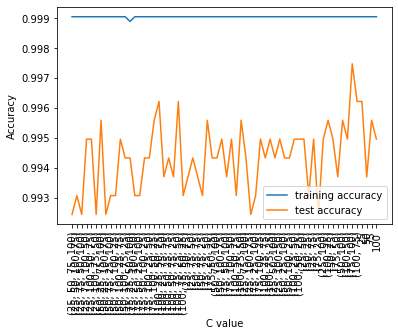

In [4]:
training_accuracy = [] 
test_accuracy = []
hidden_layers_size = layers_generator()
for i in hidden_layers_size:
    print("layer size : %s" % (i,))
    mlp = MLPClassifier(hidden_layer_sizes=i, random_state=0) 
    mlp.fit(data_train, target_train)
    training_accuracy.append(mlp.score(data_train, target_train))
    test_accuracy.append(mlp.score(data_test, target_test))
'''
plt.plot(degrees, training_accuracy, label="training accuracy") 
plt.plot(degrees, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("degree")
plt.legend()'''

plt.plot(range(len(hidden_layers_size)), training_accuracy, label="training accuracy")
plt.plot(range(len(hidden_layers_size)), test_accuracy, label="test accuracy")
plt.xticks(range(len(hidden_layers_size)),hidden_layers_size)
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.xlabel("C value")
plt.legend()

#### Final choice

In [5]:
gt = pd.read_csv('../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(75,100),random_state=0)
mlp.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(mlp.score(data_test, target_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.997
